In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Laptop_price.csv')

In [2]:
# Manually convert the 'Brand' column to one-hot encoding
brands = data['Brand'].unique()
brand_dict = {brand: idx for idx, brand in enumerate(brands)}  # Create a dictionary mapping brands to indices
brand_encoded = np.zeros((len(data), len(brands)))  # Initialize a zero matrix for one-hot encoding
for i, brand in enumerate(data['Brand']):
    brand_encoded[i, brand_dict[brand]] = 1  # Set the corresponding brand index to 1

# Prepare features (Processor_Speed, RAM_Size, Storage_Capacity, Screen_Size, Weight, Brand) and target (Price)
X = np.hstack([
    data[['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight']].values,
    brand_encoded
])
y = data['Price'].values

# Split the data into training (80%) and testing (20%) sets
np.random.seed(42)  # Set random seed for reproducibility
indices = np.random.permutation(len(X))  # Shuffle indices
train_size = int(0.8 * len(X))  # Calculate size of training set
train_idx, test_idx = indices[:train_size], indices[train_size:]  # Split indices
X_train, X_test = X[train_idx], X[test_idx]  # Split features
y_train, y_test = y[train_idx], y[test_idx]  # Split target

# Standardize the features manually (zero mean, unit variance)
def standardize(X):
    mean = np.mean(X, axis=0)  # Calculate mean for each feature
    std = np.std(X, axis=0)  # Calculate standard deviation for each feature
    std[std == 0] = 1  # Avoid division by zero
    return (X - mean) / std, mean, std  # Return standardized data, mean, and std

X_train_scaled, train_mean, train_std = standardize(X_train)  # Standardize training data
X_test_scaled = (X_test - train_mean) / train_std  # Standardize test data using training mean and std

# Calculate Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)  # Compute average squared difference

In [4]:
# 1. Linear Regression using Normal Equation
def linear_regression_normal(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term (column of ones)
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # Solve theta = (X^T X)^(-1) X^T y
    return theta

def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term for predictions
    return X_b.dot(theta)  # Compute predictions: X * theta

theta_normal = linear_regression_normal(X_train_scaled, y_train)  # Train model
y_pred_normal = predict(X_test_scaled, theta_normal)  # Predict on test set
loss_normal = mean_squared_error(y_test, y_pred_normal)  # Compute MSE
print(f"Linear Regression (Normal Equation) MSE: {loss_normal}")
print(f"Weights: {theta_normal[1:]}")
print(f"Bias: {theta_normal[0]}")
print('--------------------------------------------------------------')
# 2. Ridge Regularization
def ridge_regression(X, y, alpha=1.0):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    m = X_b.shape[1]  # Number of features including bias
    I = np.eye(m)  # Identity matrix for regularization
    I[0, 0] = 0  # Do not regularize the bias term
    theta = np.linalg.inv(X_b.T.dot(X_b) + alpha * I).dot(X_b.T).dot(y)  # Solve theta = (X^T X + alpha I)^(-1) X^T y
    return theta

theta_ridge = ridge_regression(X_train_scaled, y_train, alpha=1.0)  # Train Ridge model
y_pred_ridge = predict(X_test_scaled, theta_ridge)  # Predict on test set
loss_ridge = mean_squared_error(y_test, y_pred_ridge)  # Compute MSE
print(f"Ridge Regression MSE: {loss_ridge}")
print(f"Ridge Weights: {theta_ridge[1:]}")
print(f"Ridge Bias: {theta_ridge[0]}")

print('--------------------------------------------------------------')
# 3. Batch Gradient Descent
def batch_gradient_descent(X, y, eta=0.01, n_iterations=1000):
    m = X.shape[0]  # Number of training samples
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
    theta = np.random.randn(X_b.shape[1])  # Initialize random weights
    
    for iteration in range(n_iterations):
        gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)  # Compute gradients
        theta -= eta * gradients  # Update weights
    
    return theta

theta_gd = batch_gradient_descent(X_train_scaled, y_train, eta=0.01, n_iterations=1000)  # Train model
y_pred_gd = predict(X_test_scaled, theta_gd)  # Predict on test set
loss_gd = mean_squared_error(y_test, y_pred_gd)  # Compute MSE
print(f"Batch Gradient Descent MSE: {loss_gd}")
print(f"GD Weights: {theta_gd[1:]}")
print(f"GD Bias: {theta_gd[0]}")

print('--------------------------------------------------------------')
# 4. Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, eta=0.01, n_iterations=1000):
    m = X.shape[0]  # Number of training samples
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
    theta = np.random.randn(X_b.shape[1])  # Initialize random weights
    
    for epoch in range(n_iterations):
        for i in range(m):
            random_index = np.random.randint(m)  # Pick random sample
            xi = X_b[random_index:random_index+1]  # Get single sample
            yi = y[random_index:random_index+1]  # Get corresponding target
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # Compute gradients for single sample
            theta -= eta * gradients  # Update weights
    
    return theta

theta_sgd = stochastic_gradient_descent(X_train_scaled, y_train, eta=0.01, n_iterations=1000)  # Train model
y_pred_sgd = predict(X_test_scaled, theta_sgd)  # Predict on test set
loss_sgd = mean_squared_error(y_test, y_pred_sgd)  # Compute MSE
print(f"Stochastic Gradient Descent MSE: {loss_sgd}")
print(f"SGD Weights: {theta_sgd[1:]}")
print(f"SGD Bias: {theta_sgd[0]}")

Linear Regression (Normal Equation) MSE: 78245.15163353347
Weights: [ 1.42161388e+02  5.58181627e+02  9.23580074e+03  2.87953084e+01
 -4.66020263e+00 -1.30505241e+03 -1.17815463e+03 -1.25261314e+03
 -1.05937741e+03 -1.19084625e+03]
Bias: 19287.33873073133
--------------------------------------------------------------
Ridge Regression MSE: 37442.421538654686
Ridge Weights: [ 1.41323044e+02  5.57506861e+02  9.22447198e+03  2.85510878e+01
 -4.86923940e+00  7.66726248e+00  1.73923944e+00 -2.73281278e+00
 -4.87921812e+00 -1.92437716e+00]
Ridge Bias: 19287.338730731324
--------------------------------------------------------------
Batch Gradient Descent MSE: 37952.533181782186
GD Weights: [ 1.42228455e+02  5.58015278e+02  9.23610020e+03  2.87776505e+01
 -5.25434282e+00  6.78108198e+00  1.19770226e+00 -3.41960331e+00
 -5.41566588e+00 -2.14720282e+00]
GD Bias: 19287.33869827014
--------------------------------------------------------------
Stochastic Gradient Descent MSE: 40658.48654881032
SGD

## Visualizations

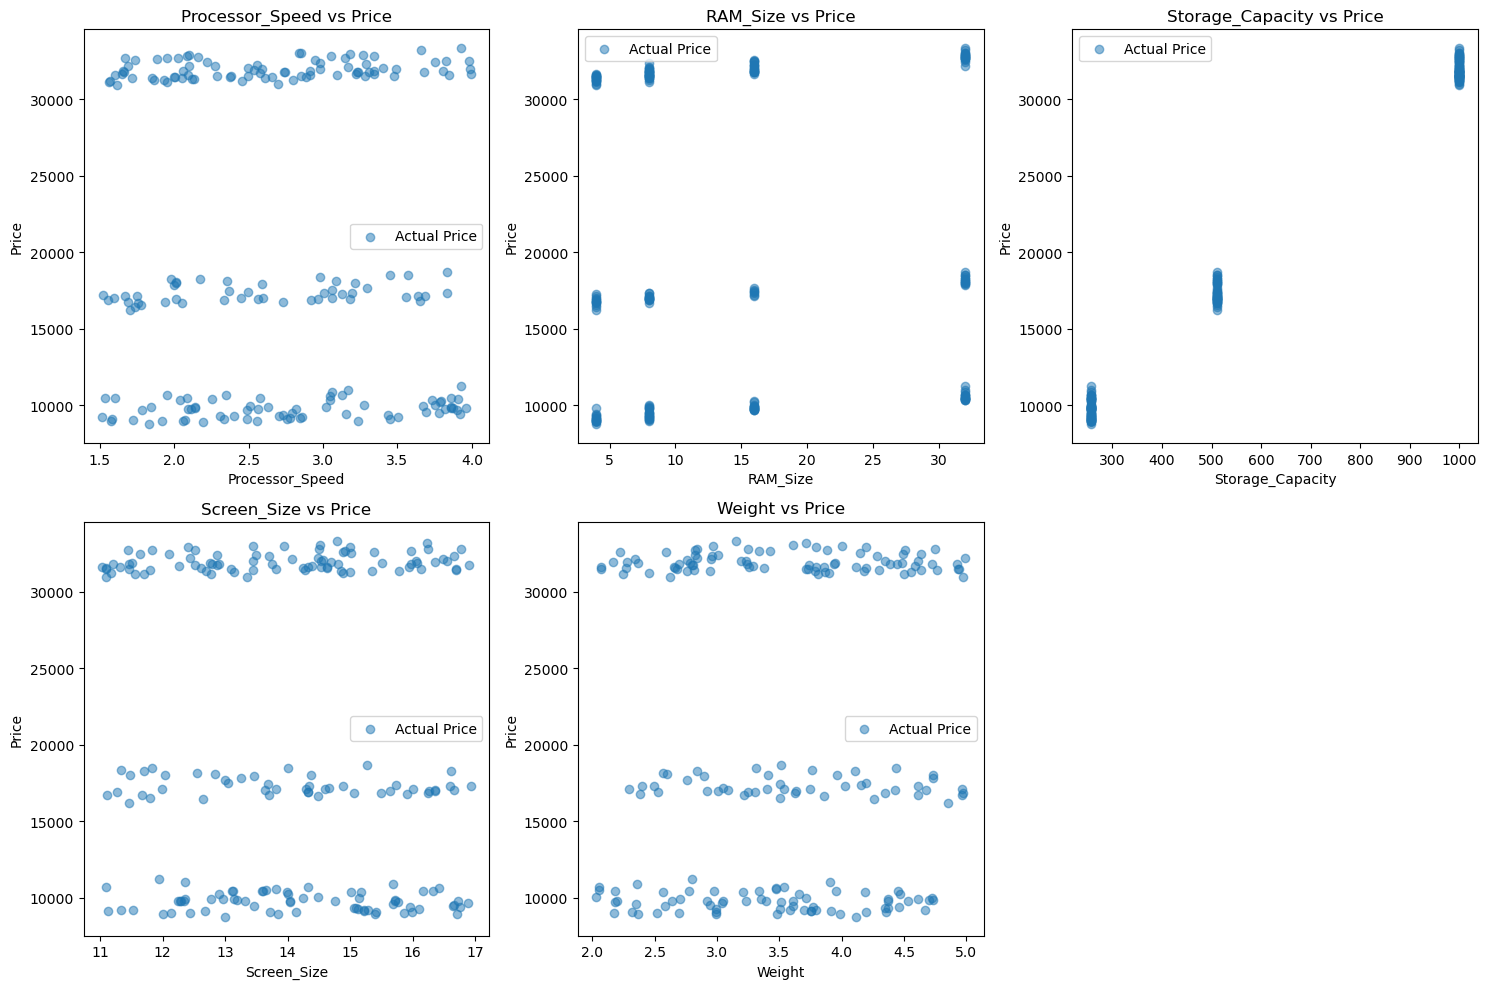

In [5]:
# 1. Scatter Plots: Feature vs Price
features = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    plt.scatter(X_test[:, i], y_test, alpha=0.5, label='Actual Price')  # Plot feature vs actual price
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'{feature} vs Price')
    plt.legend()
plt.tight_layout()
plt.show()

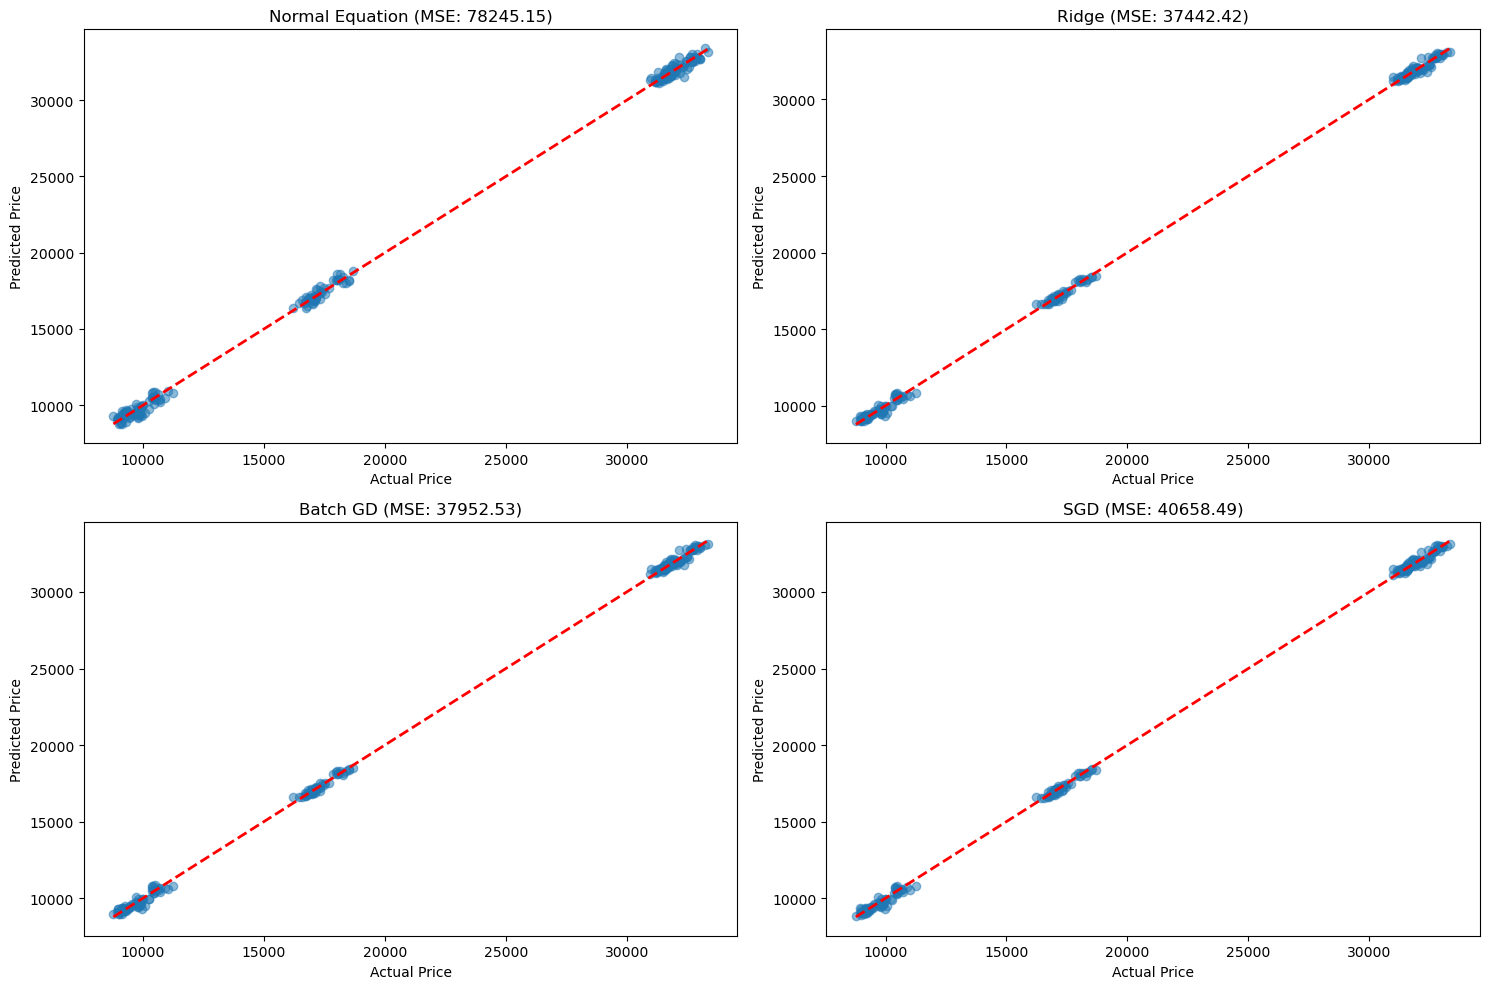

In [6]:
# 2. Actual vs Predicted Prices for Each Model
models = ['Normal Equation', 'Ridge', 'Batch GD', 'SGD']
predictions = [y_pred_normal, y_pred_ridge, y_pred_gd, y_pred_sgd]
plt.figure(figsize=(15, 10))
for i, (model, y_pred) in enumerate(zip(models, predictions)):
    plt.subplot(2, 2, i+1)
    plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs predicted prices
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Plot ideal line (y=x)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model} (MSE: {mean_squared_error(y_test, y_pred):.2f})')
plt.tight_layout()
plt.show()

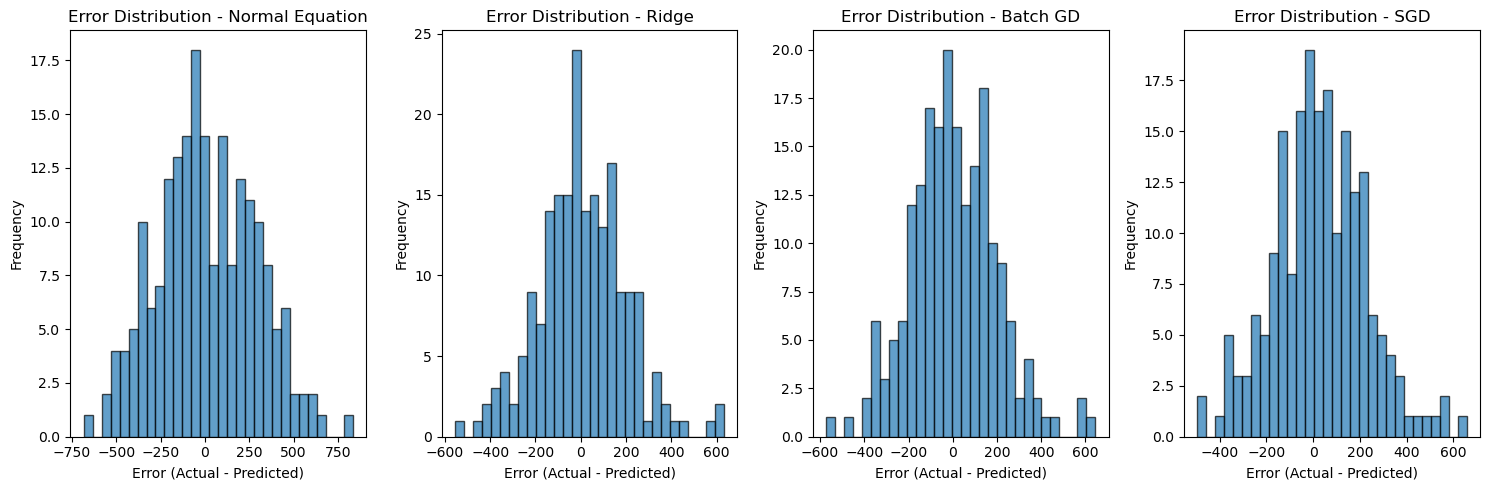

In [7]:
# 3. Error Distribution for Each Model
plt.figure(figsize=(15, 5))
for i, (model, y_pred) in enumerate(zip(models, predictions)):
    errors = y_test - y_pred  # Compute errors (actual - predicted)
    plt.subplot(1, 4, i+1)
    plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)  # Plot histogram of errors
    plt.xlabel('Error (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.title(f'Error Distribution - {model}')
plt.tight_layout()
plt.show()